<a href="https://colab.research.google.com/github/datumScience/Fashion-MNIST/blob/master/2746958_fashion_mnist_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#On your own Assignment 3
#Fashion MNIST

![alt text](https://github.com/margaretmz/deep-learning/blob/master/images/modern%20dl_fash-mnist_keras.png?raw=1)

#Loading the dataset

In [0]:
!pip install -q -U tensorflow>=1.8.0
import tensorflow as tf
from keras.datasets import fashion_mnist

import numpy as np
import matplotlib.pyplot as plt

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


## Visualize the data

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


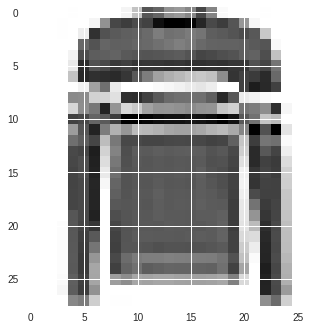

In [0]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

## Data normalization
Normalize the data dimensions so that they are of approximately the same scale.

In [0]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [0]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


## Split the data into train/validation/test data sets


*   Training data - used for training the model
*   Validation data - used for tuning the hyperparameters and evaluate the models
*   Test data - used to test the model after the model has gone through initial vetting by the validation set.



In [0]:
# Further break training data into train / validation sets #performing a 80 - 20 split of data - 80% training and 20% validation
(x_train, x_valid) = x_train[12000:], x_train[:12000] 
(y_train, y_valid) = y_train[12000:], y_train[:12000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (48000, 28, 28, 1) y_train shape: (48000, 10)
48000 train set
12000 validation set
10000 test set


#Baseline

In [0]:
#importing necessary packages
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten

In [0]:

num_classes = y_test.shape[1]
#defining the baseline model as specified in the text book
from keras import backend as K
def baseline_model():
# create model
  K.set_image_dim_ordering( 'th' )
  model = tf.keras.Sequential()

  model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
  model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
  model.add(tf.keras.layers.Dropout(0.3))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(128, activation='relu'))
  model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
  # Compile model
  model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
  return model



In [0]:
# build the model
baseline = baseline_model()
# Fit the model
baseline.fit(x_train, y_train, validation_data=(x_valid, y_valid), nb_epoch=10, batch_size=200,
verbose=2)
# Final evaluation of the model
scores = baseline.evaluate(x_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 8s - loss: 0.4675 - acc: 0.8345 - val_loss: 0.3436 - val_acc: 0.8808
Epoch 2/10
 - 7s - loss: 0.3142 - acc: 0.8875 - val_loss: 0.3164 - val_acc: 0.8861
Epoch 3/10
 - 7s - loss: 0.2738 - acc: 0.9014 - val_loss: 0.2712 - val_acc: 0.9039
Epoch 4/10
 - 7s - loss: 0.2444 - acc: 0.9112 - val_loss: 0.2618 - val_acc: 0.9091
Epoch 5/10
 - 7s - loss: 0.2302 - acc: 0.9159 - val_loss: 0.2630 - val_acc: 0.9034
Epoch 6/10
 - 7s - loss: 0.2095 - acc: 0.9245 - val_loss: 0.2540 - val_acc: 0.9078
Epoch 7/10
 - 7s - loss: 0.1967 - acc: 0.9266 - val_loss: 0.2486 - val_acc: 0.9101
Epoch 8/10
 - 7s - loss: 0.1788 - acc: 0.9345 - val_loss: 0.2414 - val_acc: 0.9150
Epoch 9/10
 - 7s - loss: 0.1679 - acc: 0.9386 - val_loss: 0.2382 - val_acc: 0.9158
Epoch 10/10
 - 7s - loss: 0.1519 - acc: 0.9437 - val_loss: 0.2462 - val_acc: 0.9131
CNN Error: 9.00%


In [0]:
test_accuracy(x_test,y_test,baseline)


 Test accuracy: 0.91


#New Model

In [0]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 128)       640       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 64)        32832     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 3136)              0         
__________

## Compile the model
Configure the learning process with compile() API before training the model. It receives three arguments:

*   An optimizer 
*   A loss function 
*   A list of metrics 


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


In [0]:
def cnn_model():
  model = tf.keras.Sequential()

  # Must define the input shape in the first layer of the neural network
  model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
  model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
  model.add(tf.keras.layers.Dropout(0.3))

  model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
  model.add(tf.keras.layers.Dropout(0.3))


  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(256, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(128, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(64, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))

  # Take a look at the model summary
  model.summary()

  model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
  return model

## Train the model

Now let's train the model with fit() API.

We use  the [ModelCheckpoint](https://keras.io/callbacks/#modelcheckpoint) API to save the model after every epoch. Set "save_best_only = True" to save only when the validation accuracy improves.


#Defining the callback and ModelCheckpoint classes

I kept getting an error while trying to invoke ModelCheckpoint defined in keras. ("on_train_batch_begin" attribute not found in ModelCheckpoint). To combat that, I copied the source code for ModelCheckpoint and its parent class Callback and added the outlines for on_train_batch_begin and on_train_batch_end.

In [0]:
class Callback(object):
    """Abstract base class used to build new callbacks.
    # Properties
        params: dict. Training parameters
            (eg. verbosity, batch size, number of epochs...).
        model: instance of `keras.models.Model`.
            Reference of the model being trained.
    The `logs` dictionary that callback methods
    take as argument will contain keys for quantities relevant to
    the current batch or epoch.
    Currently, the `.fit()` method of the `Sequential` model class
    will include the following quantities in the `logs` that
    it passes to its callbacks:
        on_epoch_end: logs include `acc` and `loss`, and
            optionally include `val_loss`
            (if validation is enabled in `fit`), and `val_acc`
            (if validation and accuracy monitoring are enabled).
        on_batch_begin: logs include `size`,
            the number of samples in the current batch.
        on_batch_end: logs include `loss`, and optionally `acc`
            (if accuracy monitoring is enabled).
    """

    def __init__(self):
        self.validation_data = None
        self.model = None

    def set_params(self, params):
        self.params = params

    def set_model(self, model):
        self.model = model

    def on_batch_begin(self, batch, logs=None):
        """A backwards compatibility alias for `on_train_batch_begin`."""

    def on_batch_end(self, batch, logs=None):
        """A backwards compatibility alias for `on_train_batch_end`."""

    def on_epoch_begin(self, epoch, logs=None):
        """Called at the start of an epoch.
        Subclasses should override for any actions to run. This function should only
        be called during train mode.
        # Arguments
            epoch: integer, index of epoch.
            logs: dict, currently no data is passed to this argument for this method
                but that may change in the future.
        """

    def on_epoch_end(self, epoch, logs=None):
        """Called at the end of an epoch.
        Subclasses should override for any actions to run. This function should only
        be called during train mode.
        # Arguments
            epoch: integer, index of epoch.
            logs: dict, metric results for this training epoch, and for the
                validation epoch if validation is performed. Validation result keys
                are prefixed with `val_`.
        """

    def on_train_batch_begin(self, batch, logs=None):
        """Called at the beginning of a training batch in `fit` methods.
        Subclasses should override for any actions to run.
        # Arguments
            batch: integer, index of batch within the current epoch.
            logs: dict, has keys `batch` and `size` representing the current
                batch number and the size of the batch.
        """
        # For backwards compatibility
        self.on_batch_begin(batch, logs=logs)

    def on_train_batch_end(self, batch, logs=None):
        """Called at the end of a training batch in `fit` methods.
        Subclasses should override for any actions to run.
        # Arguments
            batch: integer, index of batch within the current epoch.
            logs: dict, metric results for this batch.
        """
        # For backwards compatibility
        self.on_batch_end(batch, logs=logs)

    def on_test_batch_begin(self, batch, logs=None):
        """Called at the beginning of a batch in `evaluate` methods.
        Also called at the beginning of a validation batch in the `fit` methods,
        if validation data is provided.
        Subclasses should override for any actions to run.
        # Arguments
            batch: integer, index of batch within the current epoch.
            logs: dict, has keys `batch` and `size` representing the current
                batch number and the size of the batch.
        """

    def on_test_batch_end(self, batch, logs=None):
        """Called at the end of a batch in `evaluate` methods.
        Also called at the end of a validation batch in the `fit` methods,
        if validation data is provided.
        Subclasses should override for any actions to run.
        # Arguments
            batch: integer, index of batch within the current epoch.
            logs: dict, metric results for this batch.
        """

    def on_predict_batch_begin(self, batch, logs=None):
        """Called at the beginning of a batch in `predict` methods.
        Subclasses should override for any actions to run.
        # Arguments
            batch: integer, index of batch within the current epoch.
            logs: dict, has keys `batch` and `size` representing the current
                batch number and the size of the batch.
        """

    def on_predict_batch_end(self, batch, logs=None):
        """Called at the end of a batch in `predict` methods.
        Subclasses should override for any actions to run.
        # Arguments
            batch: integer, index of batch within the current epoch.
            logs: dict, metric results for this batch.
        """

    def on_train_begin(self, logs=None):
        """Called at the beginning of training.
        Subclasses should override for any actions to run.
        # Arguments
            logs: dict, currently no data is passed to this argument for this method
                but that may change in the future.
        """

    def on_train_end(self, logs=None):
        """Called at the end of training.
        Subclasses should override for any actions to run.
        # Arguments
            logs: dict, currently no data is passed to this argument for this method
                but that may change in the future.
        """

    def on_test_begin(self, logs=None):
        """Called at the beginning of evaluation or validation.
        Subclasses should override for any actions to run.
        # Arguments
            logs: dict, currently no data is passed to this argument for this method
                but that may change in the future.
        """

    def on_test_end(self, logs=None):
        """Called at the end of evaluation or validation.
        Subclasses should override for any actions to run.
        # Arguments
            logs: dict, currently no data is passed to this argument for this method
                but that may change in the future.
        """

    def on_predict_begin(self, logs=None):
        """Called at the beginning of prediction.
        Subclasses should override for any actions to run.
        # Arguments
            logs: dict, currently no data is passed to this argument for this method
                but that may change in the future.
        """

    def on_predict_end(self, logs=None):
        """Called at the end of prediction.
        Subclasses should override for any actions to run.
        # Arguments
            logs: dict, currently no data is passed to this argument for this method
                but that may change in the future.
        """


class ModelCheckpoint(Callback):
    """Save the model after every epoch.
    `filepath` can contain named formatting options,
    which will be filled with the values of `epoch` and
    keys in `logs` (passed in `on_epoch_end`).
    For example: if `filepath` is `weights.{epoch:02d}-{val_loss:.2f}.hdf5`,
    then the model checkpoints will be saved with the epoch number and
    the validation loss in the filename.
    # Arguments
        filepath: string, path to save the model file.
        monitor: quantity to monitor.
        verbose: verbosity mode, 0 or 1.
        save_best_only: if `save_best_only=True`,
            the latest best model according to
            the quantity monitored will not be overwritten.
        save_weights_only: if True, then only the model's weights will be
            saved (`model.save_weights(filepath)`), else the full model
            is saved (`model.save(filepath)`).
        mode: one of {auto, min, max}.
            If `save_best_only=True`, the decision
            to overwrite the current save file is made
            based on either the maximization or the
            minimization of the monitored quantity. For `val_acc`,
            this should be `max`, for `val_loss` this should
            be `min`, etc. In `auto` mode, the direction is
            automatically inferred from the name of the monitored quantity.
        period: Interval (number of epochs) between checkpoints.
    """

    def __init__(self, filepath, monitor='val_loss', verbose=0,
                 save_best_only=False, save_weights_only=False,
                 mode='auto', period=1):
        super(ModelCheckpoint, self).__init__()
        self.monitor = monitor
        self.verbose = verbose
        self.filepath = filepath
        self.save_best_only = save_best_only
        self.save_weights_only = save_weights_only
        self.period = period
        self.epochs_since_last_save = 0

        if mode not in ['auto', 'min', 'max']:
            warnings.warn('ModelCheckpoint mode %s is unknown, '
                          'fallback to auto mode.' % (mode),
                          RuntimeWarning)
            mode = 'auto'

        if mode == 'min':
            self.monitor_op = np.less
            self.best = np.Inf
        elif mode == 'max':
            self.monitor_op = np.greater
            self.best = -np.Inf
        else:
            if 'acc' in self.monitor or self.monitor.startswith('fmeasure'):
                self.monitor_op = np.greater
                self.best = -np.Inf
            else:
                self.monitor_op = np.less
                self.best = np.Inf


    def on_train_batch_begin(self,batch,logs={}):
      return
    def on_train_batch_end(self,batch,logs={}):
      return
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        self.epochs_since_last_save += 1
        if self.epochs_since_last_save >= self.period:
            self.epochs_since_last_save = 0
            filepath = self.filepath.format(epoch=epoch + 1, **logs)
            if self.save_best_only:
                current = logs.get(self.monitor)
                if current is None:
                    warnings.warn('Can save best model only with %s available, '
                                  'skipping.' % (self.monitor), RuntimeWarning)
                else:
                    if self.monitor_op(current, self.best):
                        if self.verbose > 0:
                            print('\nEpoch %05d: %s improved from %0.5f to %0.5f,'
                                  ' saving model to %s'
                                  % (epoch + 1, self.monitor, self.best,
                                     current, filepath))
                        self.best = current
                        if self.save_weights_only:
                            self.model.save_weights(filepath, overwrite=True)
                        else:
                            self.model.save(filepath, overwrite=True)
                    else:
                        if self.verbose > 0:
                            print('\nEpoch %05d: %s did not improve from %0.5f' %
                                  (epoch + 1, self.monitor, self.best))
            else:
                if self.verbose > 0:
                    print('\nEpoch %05d: saving model to %s' % (epoch + 1, filepath))
                if self.save_weights_only:
                    self.model.save_weights(filepath, overwrite=True)
                else:
                    self.model.save(filepath, overwrite=True)



#Mounting gdrive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


#Saving model with best validation accuracy

In [0]:

checkpointer = ModelCheckpoint(filepath='/content/gdrive/My Drive/myweights-improvement.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
47872/48000 [============================>.] - ETA: 0s - loss: 0.9130 - acc: 0.6646
Epoch 00001: val_loss improved from inf to 0.47138, saving model to /content/gdrive/My Drive/myweights-improvement.hdf5
48000/48000 [==============================] - 16s 336us/sample - loss: 0.9121 - acc: 0.6649 - val_loss: 0.4714 - val_acc: 0.8155
Epoch 2/10
47936/48000 [============================>.] - ETA: 0s - loss: 0.5560 - acc: 0.8074
Epoch 00002: val_loss improved from 0.47138 to 0.38578, saving model to /content/gdrive/My Drive/myweights-improvement.hdf5
48000/48000 [==============================] - 14s 283us/sample - loss: 0.5560 - acc: 0.8074 - val_loss: 0.3858 - val_acc: 0.8598
Epoch 3/10
47936/48000 [============================>.] - ETA: 0s - loss: 0.4793 - acc: 0.8369
Epoch 00003: val_loss improved from 0.38578 to 0.33745, saving model to /content/gdrive/My Drive/myweights-improvement.hdf5
48000/48000 [========================

#Load model with best validation accuracy

In [0]:
# Load the weights with the best validation accuracy
model.load_weights('/content/gdrive/My Drive/myweights-improvement.hdf5')

#Test Accuracy

In [0]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.91


## Test Accuracy

In [0]:
def test_accuracy(x_test,y_test,model):
  # Evaluate the model on test set
  score = model.evaluate(x_test, y_test, verbose=0)

  # Print test accuracy
  print('\n', 'Test accuracy:', score[1])

#Data Preprocessing

##Feature Standardization

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:923: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3 or 4 channels on axis 1. However, it was passed an array with shape (48000, 28, 28, 1) (28 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:334: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:923: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3 or 4 channels on axis 1. However, it was passed an array with shape (12000, 28, 28, 1) (28 channels).
  ' channel

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 128)       640       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 64)        32832     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 3136)              0         
__________

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3, or 4 channels on axis 1. However, it was passed an array with shape (48000, 28, 28, 1) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3, or 4 channels on axis 1. However, it was passed an array with shape (12000, 28, 28, 1) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


375/375 [==============================] - 5s 13ms/step - loss: 1.1609 - acc: 0.6304

Epoch 00001: val_loss improved from inf to 1.16086, saving model to /content/gdrive/My Drive/myweights-improvement-fs.hdf5
1500/1500 [==============================] - 30s 20ms/step - loss: 0.8577 - acc: 0.6855 - val_loss: 1.1609 - val_acc: 0.6304


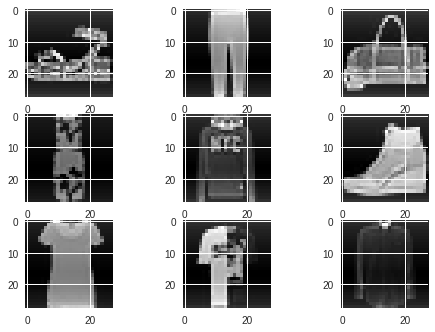

In [0]:
# Standardize images across the dataset, mean=0, stdev=1
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot


checkpointer = ModelCheckpoint(filepath='/content/gdrive/My Drive/myweights-improvement-fs.hdf5', verbose = 1, save_best_only=True)
# reshape to be [samples][pixels][width][height]
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28,1)
# convert from int to float
x_train = x_train.astype( 'float32' )
x_test = x_test.astype( 'float32' )
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# fit parameters from data
datagen.fit(x_train)
#creating validation generator
val_datagen = ImageDataGenerator(zca_whitening=True)
val_datagen.fit(x_valid)


model = cnn_model()
# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),steps_per_epoch=len(x_train) / 32, epochs=10,validation_data = val_datagen.flow(x_valid, y_valid, batch_size=32),callbacks=[checkpointer])

# configure batch size and retrieve one batch of images
for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
# create a grid of 3x3 images
  for i in range(0, 9):
   # model.fit(x_batch, y_batch )
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(x_batch[i].reshape(28, 28), cmap=pyplot.get_cmap( 'gray' ))
# show the plot
  pyplot.show()
  break
  



The accuracy with feature standardization is quite less, giving only 28% accuracy with the validation set. 

In [0]:
# Load the weights with the best validation accuracy
model.load_weights('/content/gdrive/My Drive/myweights-improvement-fs.hdf5')

In [0]:
  test_accuracy(x_test,y_test,model)


 Test accuracy: 0.408


After choosing the best epoch and evaluating the test set performance we get 91.63% accuracy.

##ZCA Whitening

In [0]:
# ZCA whitening
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load data
checkpointer = ModelCheckpoint(filepath='/content/gdrive/My Drive/myweights-improvement-zca.hdf5', verbose = 1, save_best_only=True)
# reshape to be [samples][pixels][width][height]
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)

x_test = x_test.reshape(x_test.shape[0],28, 28,1)
# convert from int to float
x_train = x_train.astype( 'float32' )
x_test = x_test.astype( 'float32' )
# define data preparation
datagen = ImageDataGenerator(zca_whitening=True)
# fit parameters from data
datagen.fit(x_train)

#creating validation generator
val_datagen = ImageDataGenerator(zca_whitening=True)
val_datagen.fit(x_valid)


# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),steps_per_epoch=len(x_train) / 32, epochs=10,validation_data = val_datagen.flow(x_valid, y_valid, batch_size=32),callbacks=[checkpointer])

# configure batch size and retrieve one batch of images
for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
# create a grid of 3x3 images
  for i in range(0, 9):
    #model.fit(x_batch,y_batch)
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(x_batch[i].reshape(28, 28), cmap=pyplot.get_cmap( 'gray' ))
# show the plot
  pyplot.show()
  break

The accuracy on the validation set is 87.79%

In [0]:
# Load the weights with the best validation accuracy
model.load_weights('/content/gdrive/My Drive/myweights-improvement-zca.hdf5')

In [0]:
test_accuracy(x_test,y_test,model)

The accuracy is relatively better with ZCA whitening at 58.2%

##Random Shifts

In [0]:
# Random Rotations
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

checkpointer = ModelCheckpoint(filepath='/content/gdrive/My Drive/myweights-improvement-rs.hdf5', verbose = 1, save_best_only=True)
x_train = x_train.reshape(x_train.shape[0],  28, 28, 1)
x_test = x_test.reshape(x_test.shape[0],  28, 28 ,1)
# convert from int to float
x_train = x_train.astype( 'float32' )
x_test = x_test.astype( 'float32' )
# define data preparation
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(x_train)


#creating validation generator
val_datagen = ImageDataGenerator(zca_whitening=True)
val_datagen.fit(x_valid)

# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),steps_per_epoch=len(x_train) / 32, epochs=10,validation_data =  val_datagen.flow(x_valid, y_valid, batch_size=32),callbacks=[checkpointer])

# configure batch size and retrieve one batch of images
for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
# create a grid of 3x3 images
  for i in range(0, 9):

    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(x_batch[i].reshape(28, 28), cmap=pyplot.get_cmap( 'gray' ))
    # show the plot
  pyplot.show()
  break

In [0]:
# Load the weights with the best validation accuracy
model.load_weights('/content/gdrive/My Drive/myweights-improvement-rs.hdf5')

In [0]:
test_accuracy(x_test,y_test,model)

Random shift performs even better giving an accuracy  of 78.62%

##Random Flips

In [0]:
# Random Flips
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load data
checkpointer = ModelCheckpoint(filepath='/content/gdrive/My Drive/myweights-improvement-rf.hdf5', verbose = 1, save_best_only=True)
# reshape to be [samples][pixels][width][height]
x_train = x_train.reshape(x_train.shape[0],  28, 28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28,1)
# convert from int to float
x_train = x_train.astype( 'float32' )
x_test = x_test.astype( 'float32' )
# define data preparation
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# fit parameters from data
datagen.fit(x_train)


#creating validation generator
val_datagen = ImageDataGenerator(zca_whitening=True)
val_datagen.fit(x_valid)

# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),steps_per_epoch=len(x_train) / 32, epochs=10,validation_data = val_datagen.flow(x_valid, y_valid, batch_size=32),callbacks=[checkpointer])

# configure batch size and retrieve one batch of images
for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
# create a grid of 3x3 images
  for i in range(0, 9):

    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(x_batch[i].reshape(28, 28), cmap=pyplot.get_cmap( 'gray' ))
  # show the plot
  pyplot.show()
  break

In [0]:
test_accuracy(x_test,y_test,model)

We have a even higher accuracy of 82.37% with the random flips.

#Saving to file

In [0]:
# Save augmented images to file
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import os
from keras import backend as K
K.set_image_dim_ordering( 'th' )


x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)
# convert from int to float
x_train = x_train.astype( 'float32' )
x_test = x_test.astype( 'float32' )
# define data preparation
datagen = ImageDataGenerator()
# fit parameters from data
datagen.fit(x_train)
# configure batch size and retrieve one batch of images
os.makedirs( '/content/gdrive/My Drive/augmented_images' )
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9, save_to_dir= '/content/gdrive/My Drive/augmented_images' ,
save_prefix= 'aug' , save_format= 'png' ):
# create a grid of 3x3 images
  for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap( 'gray' ))
# show the plot
  pyplot.show()
  break

## Visualize prediction
Now let's visualize the prediction using the model you just trained. 
First we get the predictions with the model from the test data.
Then we print out 15 images from the test data set, and set the titles with the prediction (and the groud truth label).
If the prediction matches the true label, the title will be green; otherwise it's displayed in red.

In [0]:
#Predictions with the Random flips pre processing technique. This model has the highest accuracy of the lot
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In this exercise the baseline model seems to be performing best. The next steps could be to modify the network architecture of the model under consideration and then incorporating data preprocessing techniques to generate a more powerful CNN model that can effectively classify the items. Of the lot , we find that random flips are the most efficient, relative to other preprocessing techniques. 